# FAKE NEWS CLASSIFIER 

![](https://miro.medium.com/max/1400/1*RGVPc-MT0q_DCHCavFRHvA.jpeg)

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline




# LOADING THE DATASET

In [2]:
data=pd.read_csv("../input/fake-news-classifier-data/test.csv")


In [3]:
data

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [4]:
data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [6]:
data.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [7]:
data.value_counts

<bound method DataFrame.value_counts of          id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                         NaN   
2               Common Dreams   
3               Daniel Victor   
4 

In [8]:
data.dtypes

id         int64
title     object
author    object
text      object
dtype: object

In [9]:
data.shape

(5200, 4)

In [10]:
data.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

# **Checking Null Values**

In [11]:
data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [12]:
data.isnull().any()

id        False
title      True
author     True
text       True
dtype: bool

***So we have to drop the null values .***

In [13]:
###Drop Nan Values
data=data.dropna()


In [14]:
data.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

***So now we can see all the null values have been dropped .***

In [15]:
## Get the Independent Features

X=data.drop('id',axis=1)


In [16]:
y=data['id']


In [17]:
y.value_counts()


24576    1
21704    1
23761    1
21712    1
25806    1
        ..
25269    1
23222    1
21175    1
25273    1
22525    1
Name: id, Length: 4575, dtype: int64

In [18]:
X.shape

(4575, 3)

In [19]:
y.shape

(4575,)

# **Exploratory Data Analysis**

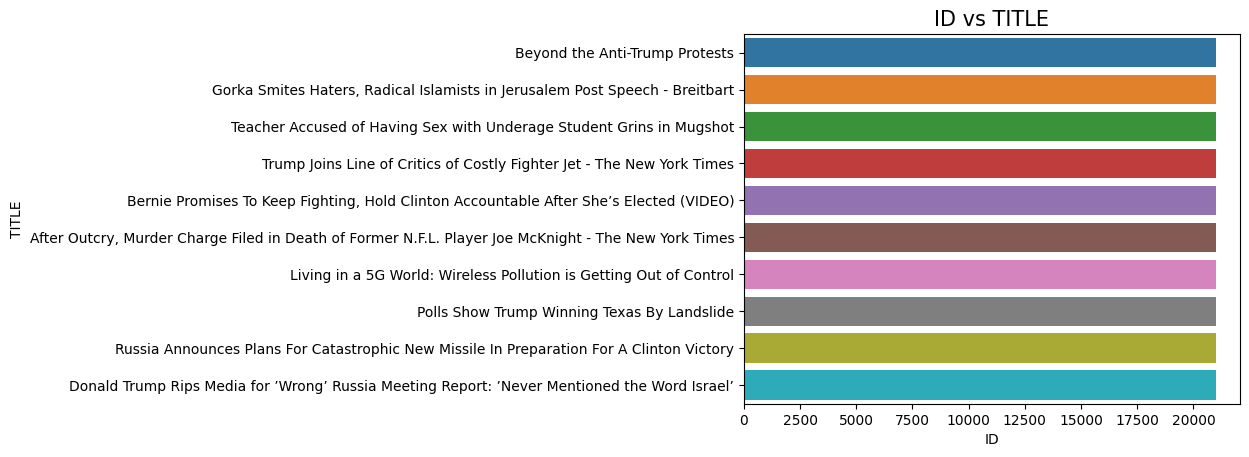

In [20]:
plt.style.use("default")
sns.barplot(x="id", y="title",data=data[180:190])
plt.title("ID vs TITLE",fontsize=15)
plt.xlabel("ID")
plt.ylabel("TITLE")
plt.show()




In [21]:
data.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

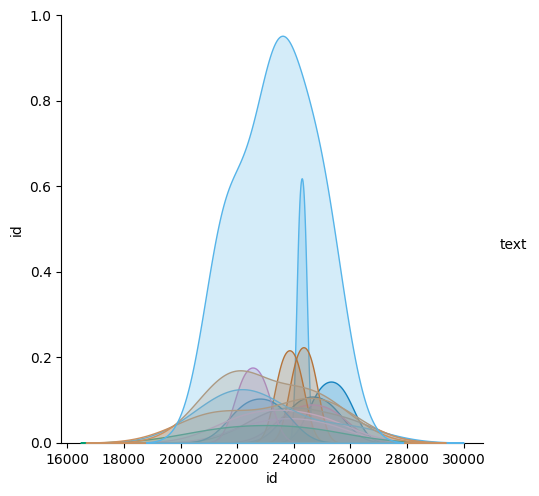

In [22]:
sns.set_palette("Paired")
sns.pairplot(data,hue='text',height=5,palette='colorblind')
plt.show()


<AxesSubplot:xlabel='id'>

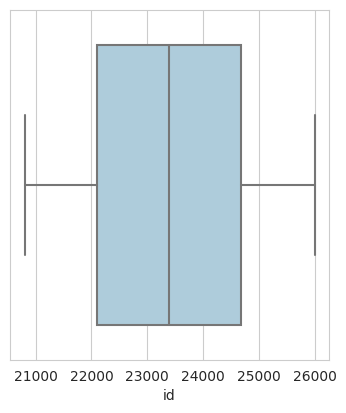

In [23]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='id',data=data)



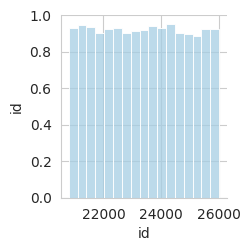

In [24]:
sns.pairplot(data=data)

In [25]:
import tensorflow as tf


**LSTM**

In [26]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense



**With Dense we can also use Dropout and Batch Normalization**

In [27]:
### Vocabulary size
voc_size=5000


In [28]:
messages=X.copy()


In [29]:
messages.reset_index(inplace=True)



**NLTK**

In [30]:
import nltk
import re
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.**

In [32]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
corpus

['specter trump loosen tongu purs string silicon valley new york time',
 'nodapl nativ american leader vow stay winter file lawsuit polic',
 'tim tebow attempt anoth comeback time basebal new york time',
 'keiser report meme war e',
 'pelosi call fbi investig find russian donald trump breitbart',
 'weekli featur profil randi shannon',
 'u gener admir endors trump command chief',
 'work class hero john brennon',
 'rise mandatori vaccin mean end medic freedom',
 'communist terror small busi',
 'comput programm come forward admit paid rig vote booth trump right usa newsflash',
 'thiev take chunk chang pound berlin museum new york time',
 'new england patriot owner still sore n f l payback sight new york time',
 'colleg republican yaf sue berkeley ann coulter event breitbart',
 'trump melt accus us postal servic steal elect clinton',
 'visit madagascar leav red swimsuit lemur recip home new york time',
 'rees peanut butter cup cheap full toxic chemic',
 'presid obama presid elect donald tr

In [34]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4, 3329, 1037, 636, 3266, 2896, 2665, 1128, 3156, 1992, 655],
 [457, 4236, 960, 3679, 2226, 1995, 2718, 203, 2797, 240],
 [1500, 349, 426, 3907, 3777, 655, 1391, 3156, 1992, 655],
 [4892, 3819, 4837, 3055, 1685],
 [3326, 3391, 3938, 2567, 569, 347, 4528, 3329, 1566],
 [2359, 3537, 3451, 1125, 2556],
 [4022, 4235, 4120, 1895, 3329, 966, 1413],
 [168, 3897, 4897, 3666, 112],
 [3164, 4507, 3902, 999, 2024, 661, 3293],
 [903, 1800, 2681, 947],
 [2208, 2797, 167, 1150, 2550, 3928, 4599, 212, 3335, 3329, 2758, 3779, 1383],
 [3898, 1934, 1071, 3250, 140, 4288, 2509, 3156, 1992, 655],
 [3156,
  3570,
  1685,
  3968,
  3835,
  3845,
  4331,
  1093,
  4684,
  2934,
  2396,
  3156,
  1992,
  655],
 [1960, 306, 1249, 1343, 4476, 1475, 3157, 79, 1566],
 [3329, 2908, 4092, 1580, 4222, 3795, 2403, 1787, 3227],
 [2403, 1264, 4028, 1945, 1792, 1958, 3781, 3859, 3156, 1992, 655],
 [4591, 2032, 1150, 2907, 2227, 4350, 2262, 1346],
 [2691, 674, 2691, 1787, 4528, 3329, 3270, 687, 94],
 [1332, 4341, 2104,

In [35]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[   0    0    0 ... 3156 1992  655]
 [   0    0    0 ...  203 2797  240]
 [   0    0    0 ... 3156 1992  655]
 ...
 [   0    0    0 ... 3156 1992  655]
 [   0    0    0 ... 3156 1992  655]
 [   0    0    0 ... 3156 1992  655]]


In [36]:
embedded_docs[0]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    4, 3329,
       1037,  636, 3266, 2896, 2665, 1128, 3156, 1992,  655], dtype=int32)

In [37]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mae',optimizer='adam',metrics=['accuracy'])



**Types of Activation Functions:**

**1) Relu**

**2) Sigmoid**

**3) Threshold**

**4) Hyperbolic Tangent**

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


**Types of Optimizers:**

**1) Gradient Descent (GD)**

**2) Stochastic Gradient Descent**

**3) Mini-Batch Gradient Descent**

**4) Adagrad**

**5) RMSProp**





In [39]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)


In [40]:
X_final.shape,y_final.shape

((4575, 20), (4575,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=256)


Epoch 1/50
13/13 [==============================] - 5s 185ms/step - loss: 23387.3029 - accuracy: 0.0000e+00 - val_loss: 23325.9961 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 1s 75ms/step - loss: 23401.2327 - accuracy: 0.0000e+00 - val_loss: 23325.9336 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 1s 75ms/step - loss: 23420.1763 - accuracy: 0.0000e+00 - val_loss: 23325.9336 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 1s 75ms/step - loss: 23421.1941 - accuracy: 0.0000e+00 - val_loss: 23325.9336 - val_accuracy: 0.0000e+00
Epoch 5/50
13/13 [==============================] - 1s 74ms/step - loss: 23425.1349 - accuracy: 0.0000e+00 - val_loss: 23325.9336 - val_accuracy: 0.0000e+00
Epoch 6/50
13/13 [==============================] - 1s 76ms/step - loss: 23432.3620 - accuracy: 0.0000e+00 - val_loss: 23325.9336 - val_accuracy: 0.0000e+00
Epoch 7/50
13/13 [==============================] - 1s 75

**MODEL CREATION**

In [43]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mae',optimizer='adam',metrics=['accuracy'])

**Types of Loss Functions:**

**1) Mean Squared Error**

**2) Regression Loss Function**

**3) Mean Absolute Error Loss**

**4) Binary Classification Loss Function**

**5) Binary Cross Entropy Loss**


In [44]:
y_pred=model.predict(X_test)


In [45]:
y_pred

array([[0.49969158],
       [0.5004783 ],
       [0.50026494],
       ...,
       [0.49788734],
       [0.49946874],
       [0.50006306]], dtype=float32)

In [46]:
print((y_pred > 0.5))


[[False]
 [ True]
 [ True]
 ...
 [False]
 [False]
 [ True]]


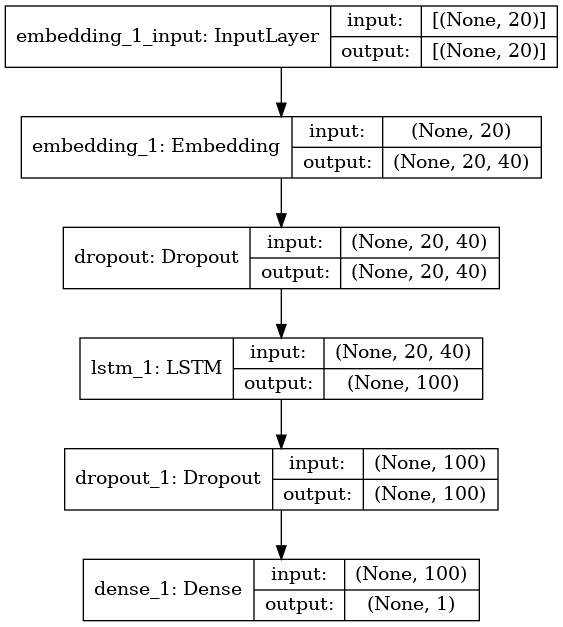

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


# **Thank You** 